In [1]:
import numpy as np
import copy
from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib inline

plt.rcParams["animation.html"] = "jshtml"

# data

In [2]:
training_set = [
    {"point": [3, 3], "label": 1},
    {"point": [4, 3], "label": 1},
    {"point": [1, 1], "label": -1}
]
hyperplane = {"normal_vector": [0, 0], "intercept": 0}
learning_rate = 1
history = []

# train

In [3]:
def isWrongSeperatedPoint(item):
    # https://github.com/hsiehpinghan/example/blob/master/formula-example/notebook/linear_algebra/point_to_hyperplane_distance.ipynb
    return item["label"] * (np.dot(hyperplane["normal_vector"], item["point"]) + hyperplane["intercept"]) <= 0

def modifyHyperplane(item):
    hyperplane["normal_vector"][0] += learning_rate * item["label"] * item["point"][0]
    hyperplane["normal_vector"][1] += learning_rate * item["label"] * item["point"][1]
    hyperplane["intercept"] += learning_rate * item["label"]

def train():
    while(True):
        hasAnyWrongSeperatedPoint = False
        for item in training_set:
            if(isWrongSeperatedPoint(item) == True):
                hasAnyWrongSeperatedPoint = True
                modifyHyperplane(item)
                history.append(copy.copy(hyperplane))
        if hasAnyWrongSeperatedPoint == False:
            break;

train()
print(history)

[{'normal_vector': [1, 1], 'intercept': 1}, {'normal_vector': [1, 1], 'intercept': 0}, {'normal_vector': [1, 1], 'intercept': -1}, {'normal_vector': [1, 1], 'intercept': -2}, {'normal_vector': [1, 1], 'intercept': -1}, {'normal_vector': [1, 1], 'intercept': -2}, {'normal_vector': [1, 1], 'intercept': -3}]


# animation

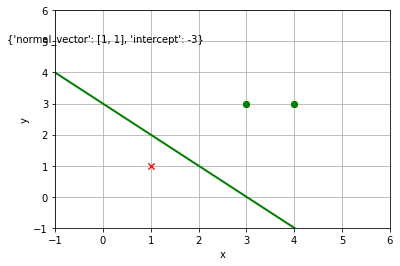

In [4]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], 'g', lw=2)
label = ax.text([], [], '')

def init_func():
    plt.axis([-1, 6, -1, 6])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    for item in training_set:
        if(item["label"] == 1):
            plt.plot(item["point"][0], item["point"][1], 'go')
        else:
            plt.plot(item["point"][0], item["point"][1], 'rx')
    return line, label

def animate(i):
    hyperplane = history[i]
    x1 = -2
    y1 = -(hyperplane["normal_vector"][0] * x1 + hyperplane["intercept"]) / hyperplane["normal_vector"][0]
    x2 = 7
    y2 = -(hyperplane["normal_vector"][0] * x2 + hyperplane["intercept"]) / hyperplane["normal_vector"][0]
    line.set_data([x1, x2], [y1, y2])
    label.set_text(hyperplane)
    x_text = x1
    y_text = y1
    label.set_position([x_text, y_text])
    return line, label

ani = animation.FuncAnimation(fig=fig, func=animate, frames=len(history), init_func=init_func)
ani